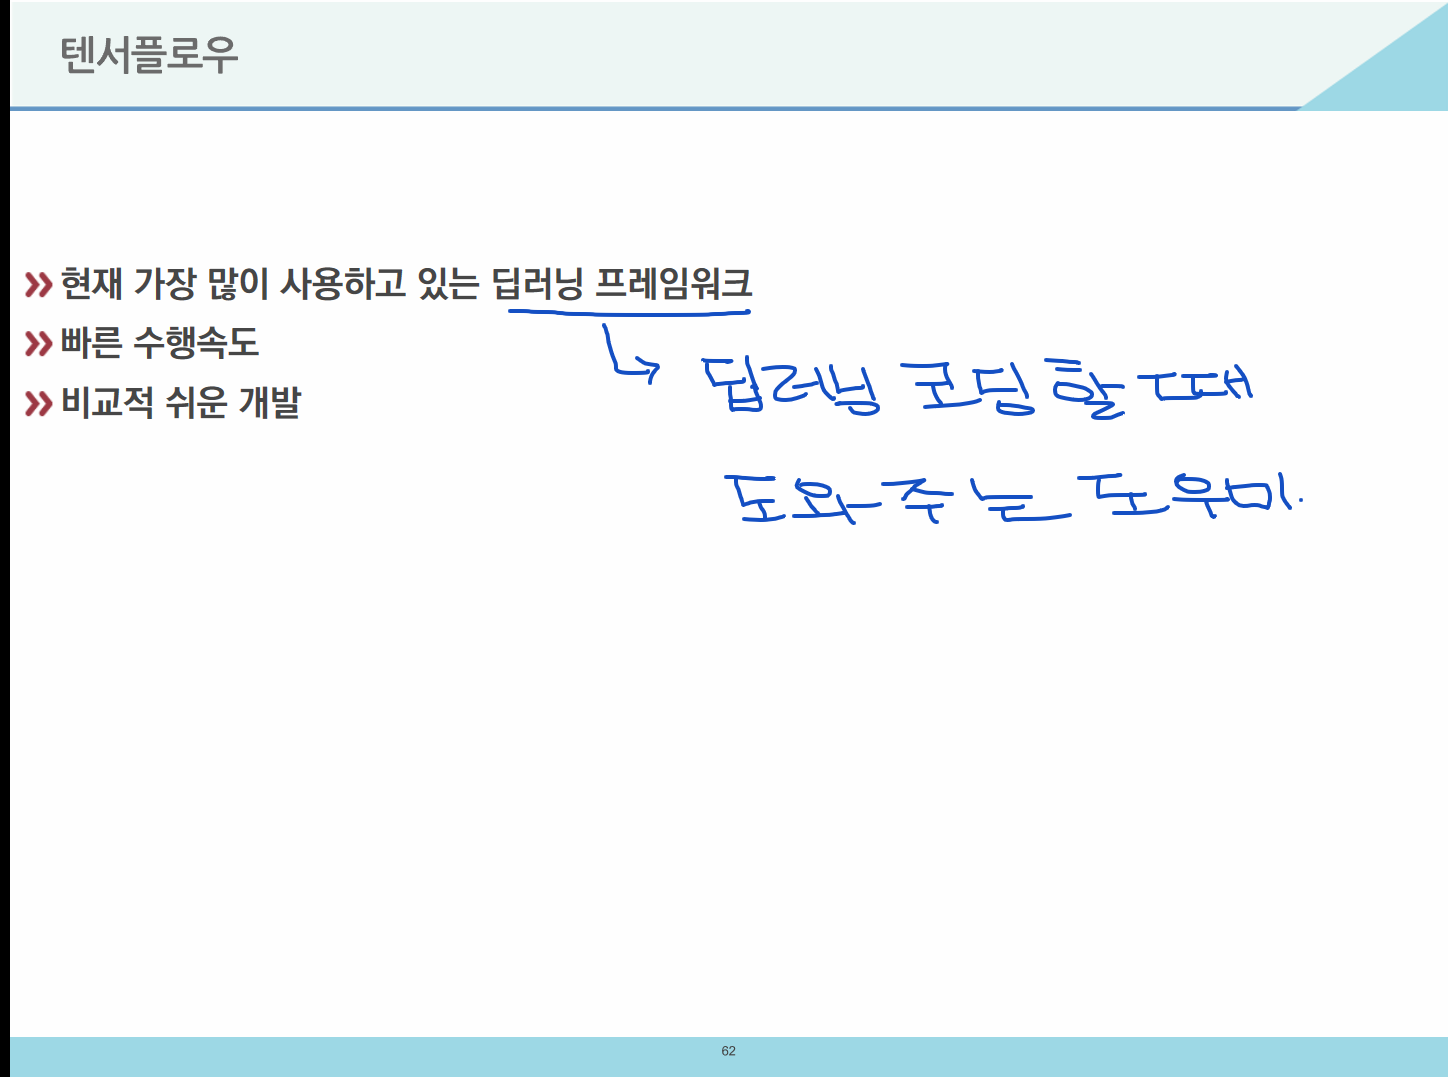

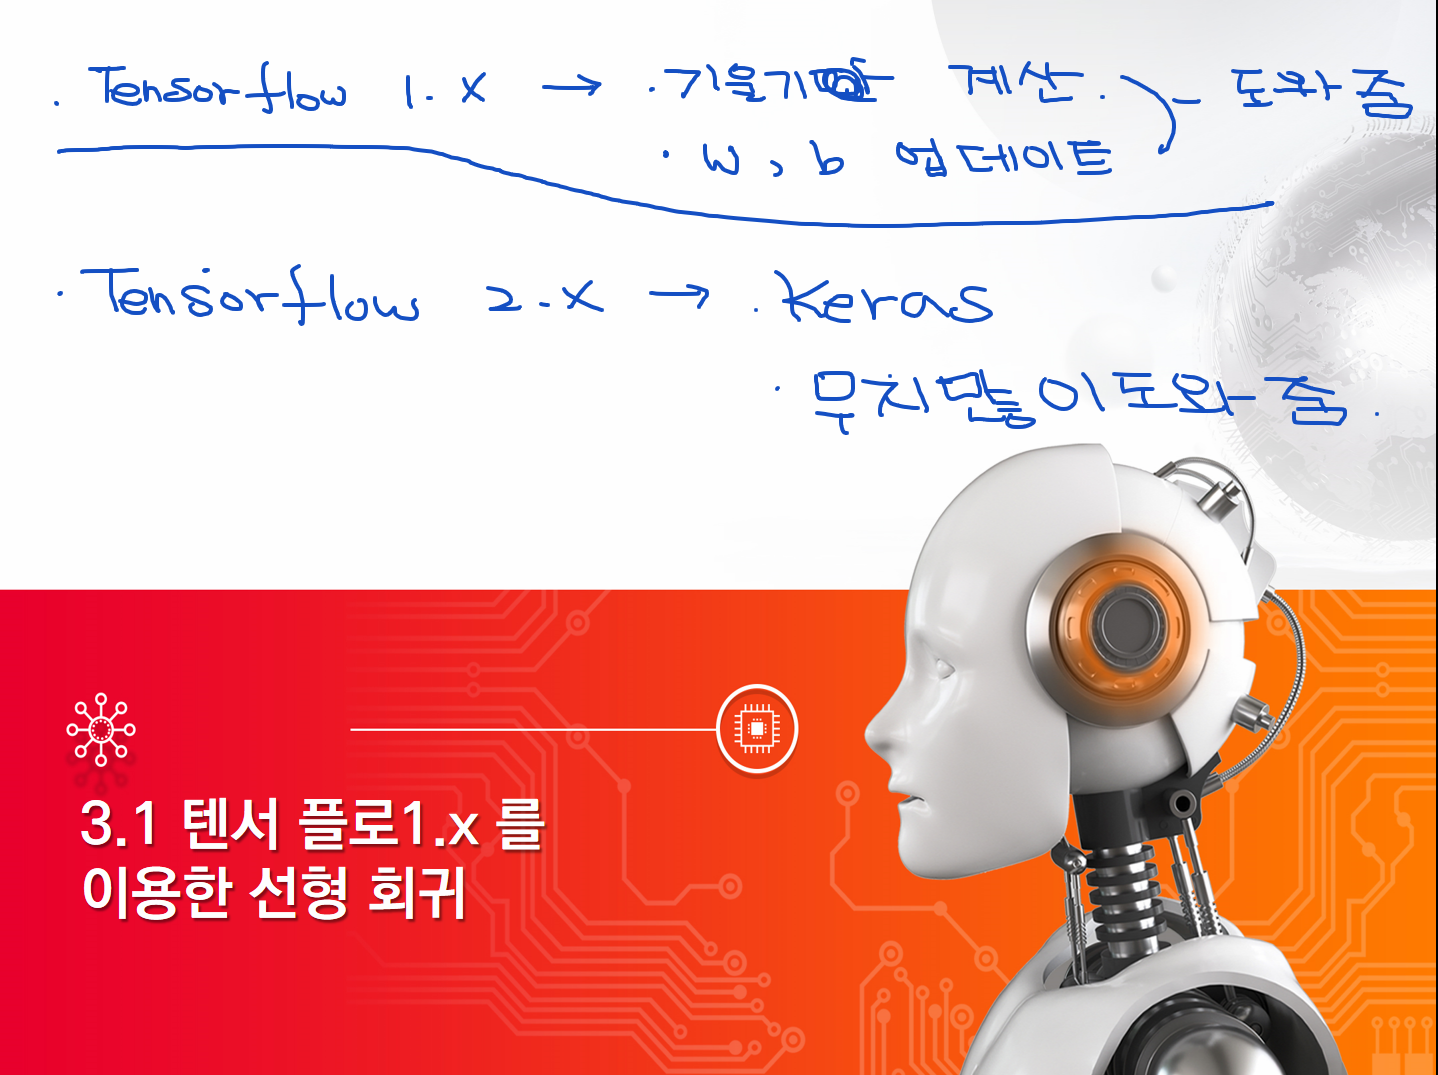

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf

In [ ]:
tf.enable_eager_execution()

In [ ]:
tf.__version__

'1.15.2'

In [ ]:
import numpy as np

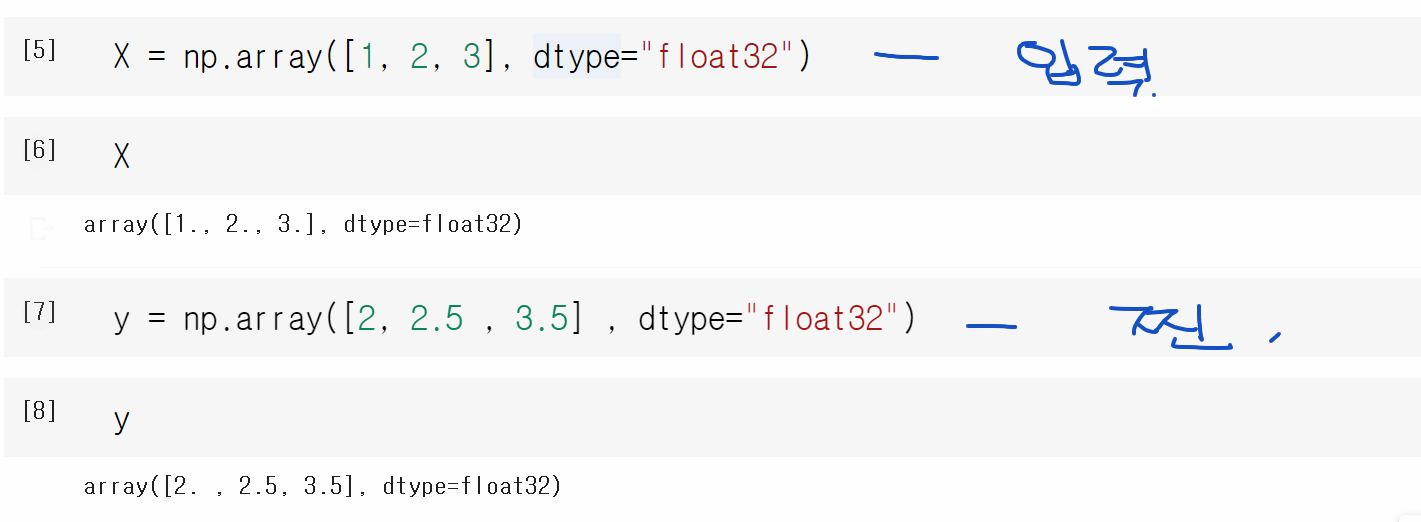

In [ ]:
X = np.array([1, 2, 3], dtype="float32")

In [ ]:
X

array([1., 2., 3.], dtype=float32)

In [ ]:
y = np.array([2, 2.5 , 3.5] , dtype="float32")

In [ ]:
y

array([2. , 2.5, 3.5], dtype=float32)

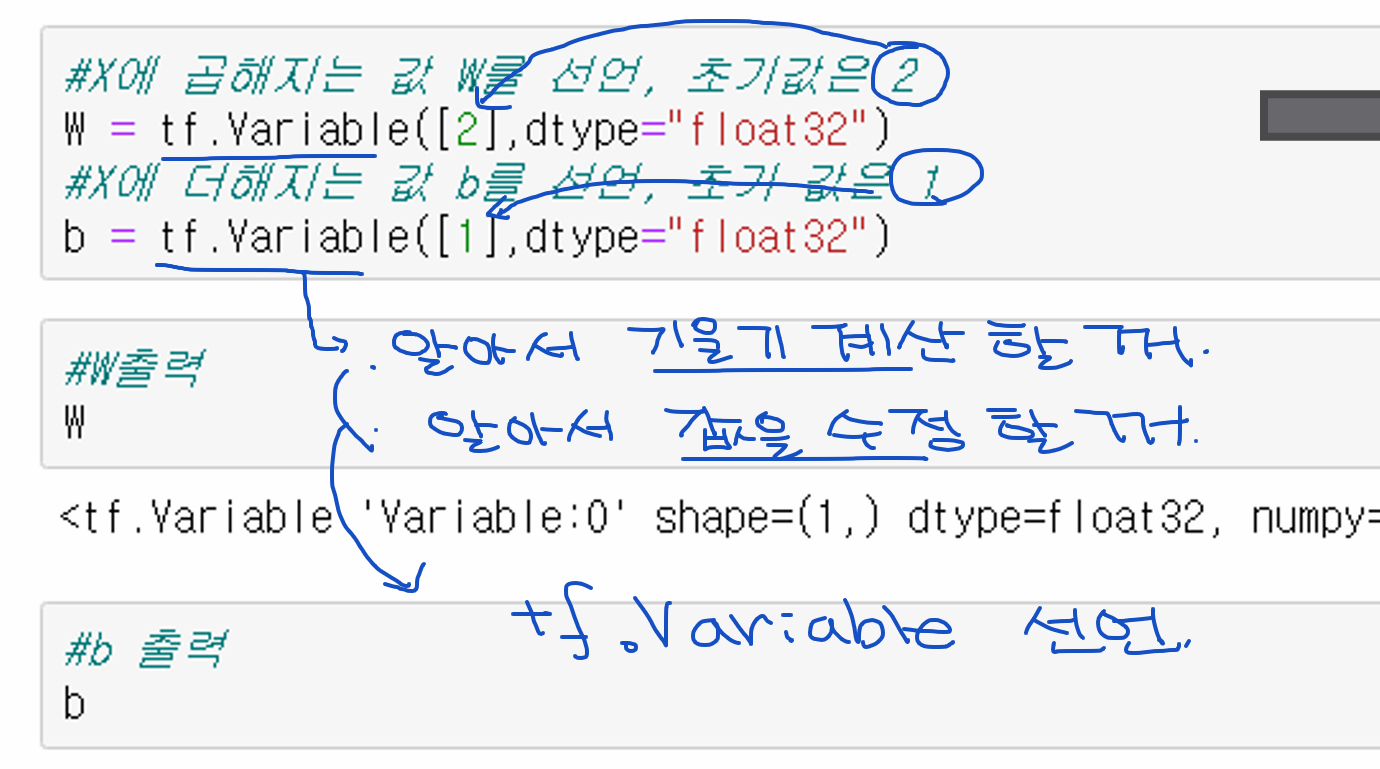

In [ ]:
w = tf.Variable([2], dtype="float32")

In [ ]:
w

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.], dtype=float32)>

In [ ]:
b = tf.Variable([1], dtype="float32")

In [ ]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.], dtype=float32)>

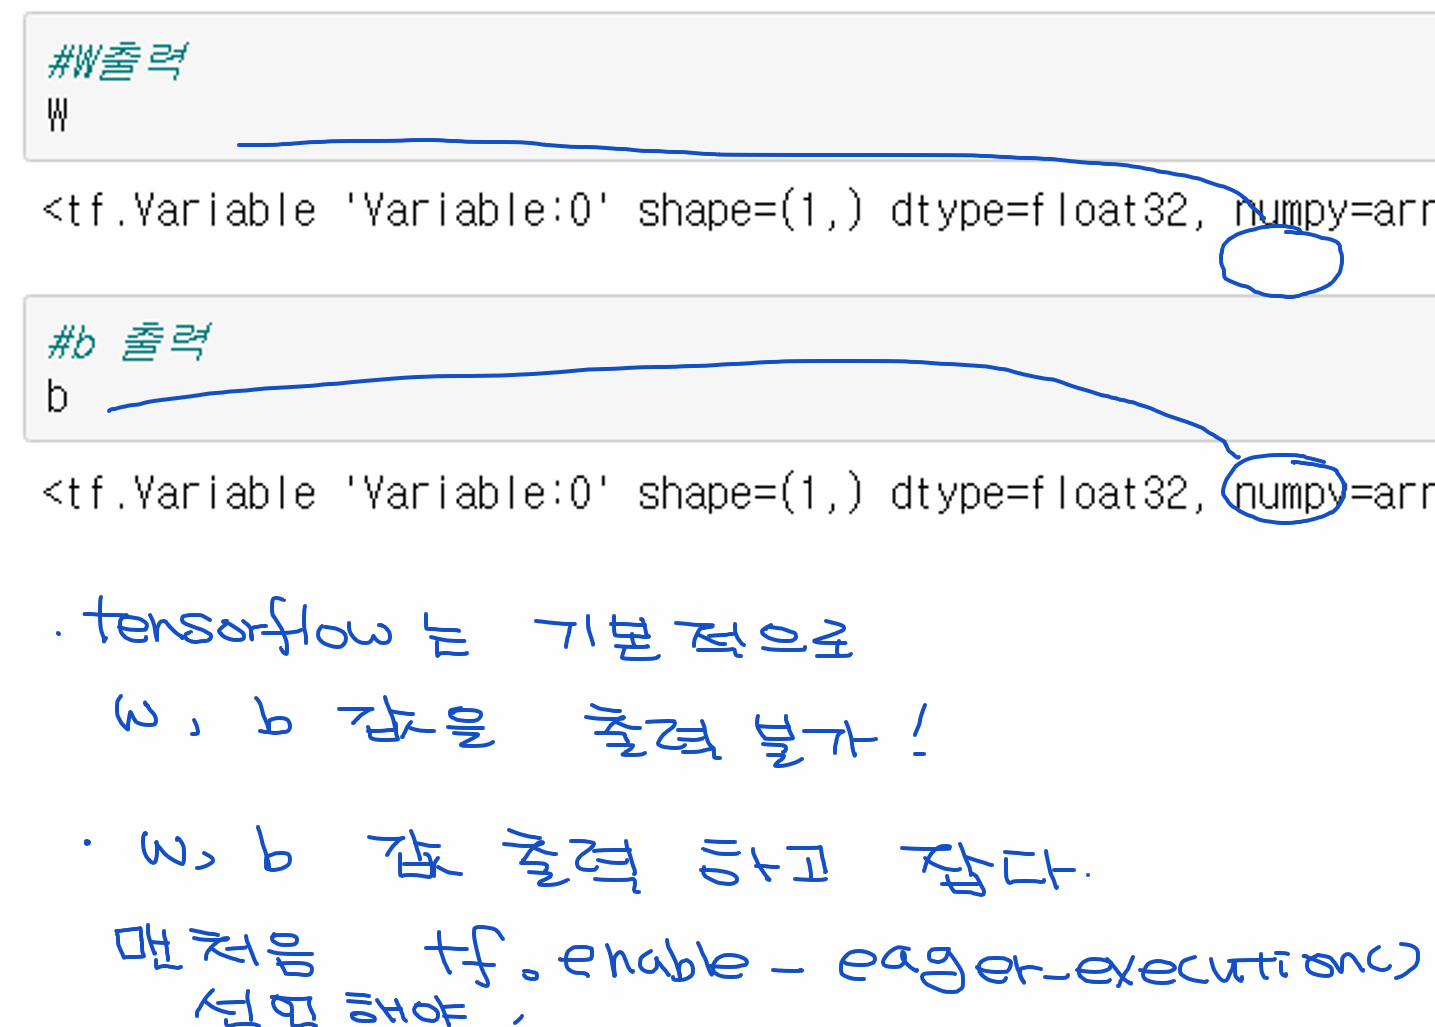

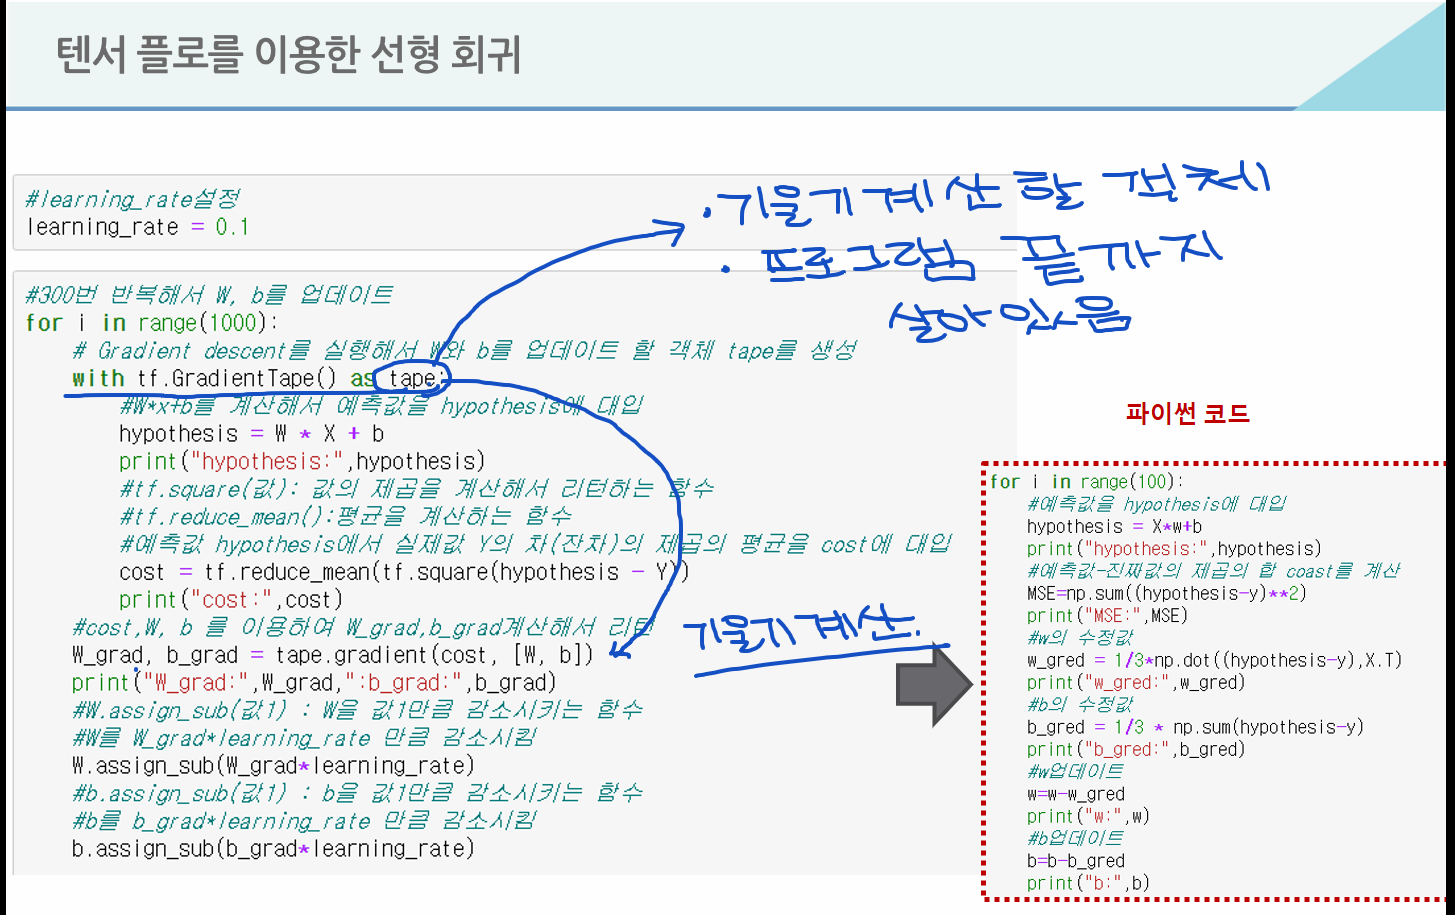

In [ ]:
learning_rte = 0.1

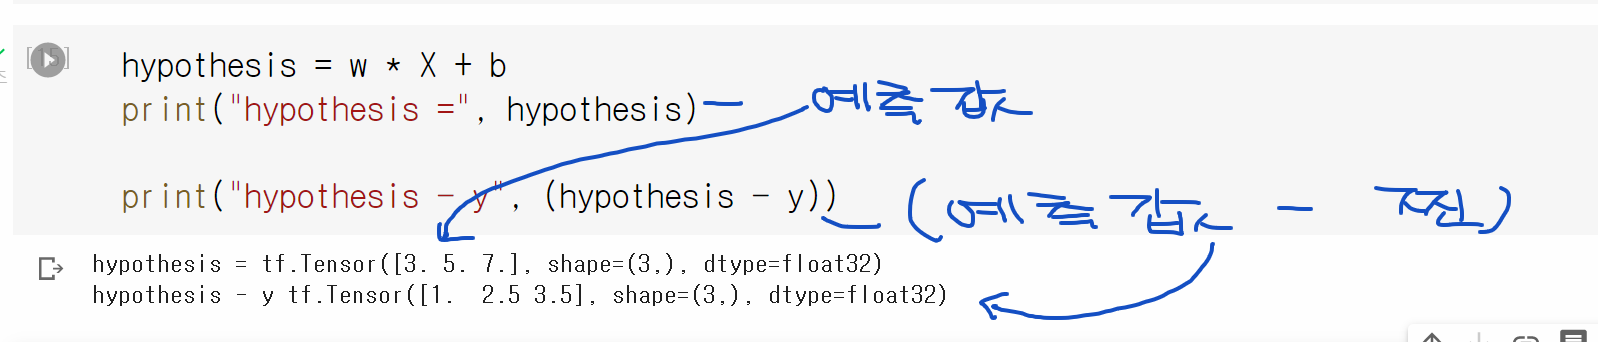

In [ ]:
hypothesis = w * X + b
print("hypothesis =", hypothesis)

print("hypothesis - y", (hypothesis - y))

hypothesis = tf.Tensor([3. 5. 7.], shape=(3,), dtype=float32)
hypothesis - y tf.Tensor([1.  2.5 3.5], shape=(3,), dtype=float32)


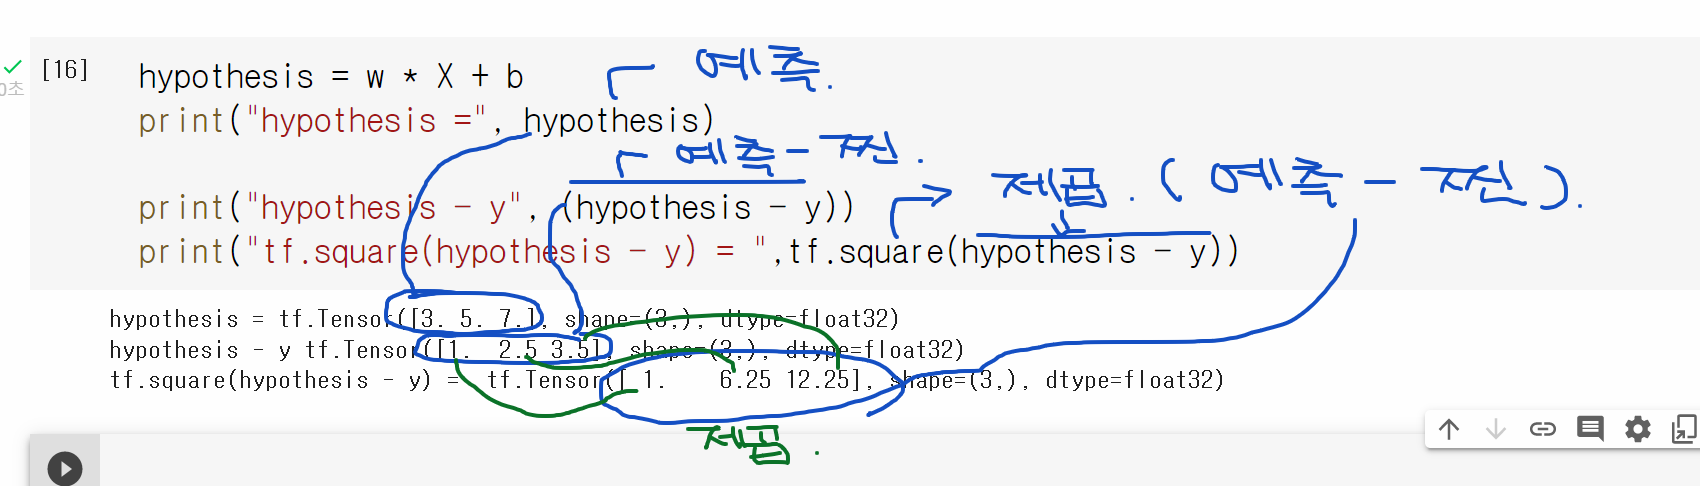

In [ ]:
hypothesis = w * X + b
print("hypothesis =", hypothesis)

print("hypothesis - y", (hypothesis - y))
print("tf.square(hypothesis - y) = ",tf.square(hypothesis - y))

hypothesis = tf.Tensor([3. 5. 7.], shape=(3,), dtype=float32)
hypothesis - y tf.Tensor([1.  2.5 3.5], shape=(3,), dtype=float32)
tf.square(hypothesis - y) =  tf.Tensor([ 1.    6.25 12.25], shape=(3,), dtype=float32)


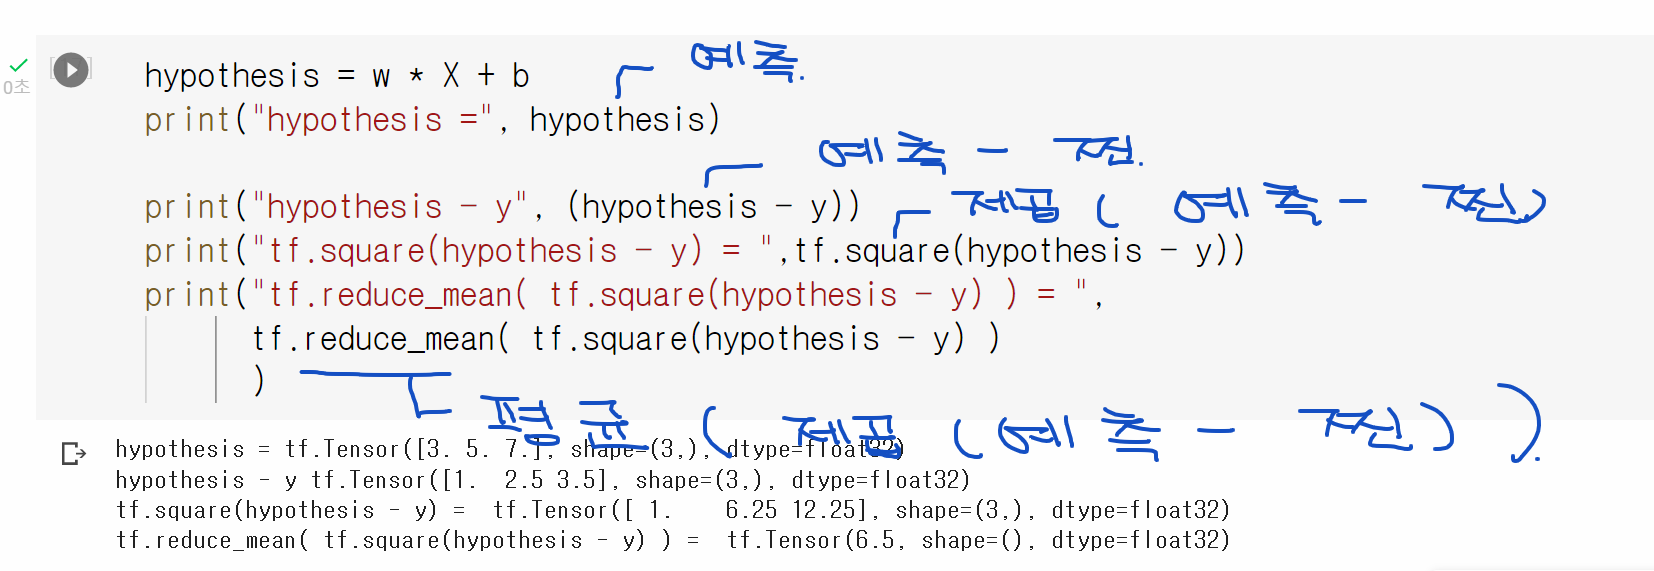

In [ ]:
hypothesis = w * X + b
print("hypothesis =", hypothesis)

print("hypothesis - y", (hypothesis - y))
print("tf.square(hypothesis - y) = ",tf.square(hypothesis - y))
print("tf.reduce_mean( tf.square(hypothesis - y) ) = ",
      tf.reduce_mean( tf.square(hypothesis - y) ) 
      )

hypothesis = tf.Tensor([3. 5. 7.], shape=(3,), dtype=float32)
hypothesis - y tf.Tensor([1.  2.5 3.5], shape=(3,), dtype=float32)
tf.square(hypothesis - y) =  tf.Tensor([ 1.    6.25 12.25], shape=(3,), dtype=float32)
tf.reduce_mean( tf.square(hypothesis - y) ) =  tf.Tensor(6.5, shape=(), dtype=float32)


In [ ]:
hypothesis = w * X + b
print("hypothesis =", hypothesis)

# print("hypothesis - y", (hypothesis - y))
# print("tf.square(hypothesis - y) = ",tf.square(hypothesis - y))
# print("tf.reduce_mean( tf.square(hypothesis - y) ) = ",
#       tf.reduce_mean( tf.square(hypothesis - y) ) 
#       )
cost = tf.reduce_mean( tf.square(hypothesis - y))
print("cost =", cost)

hypothesis = tf.Tensor([3. 5. 7.], shape=(3,), dtype=float32)
cost = tf.Tensor(6.5, shape=(), dtype=float32)


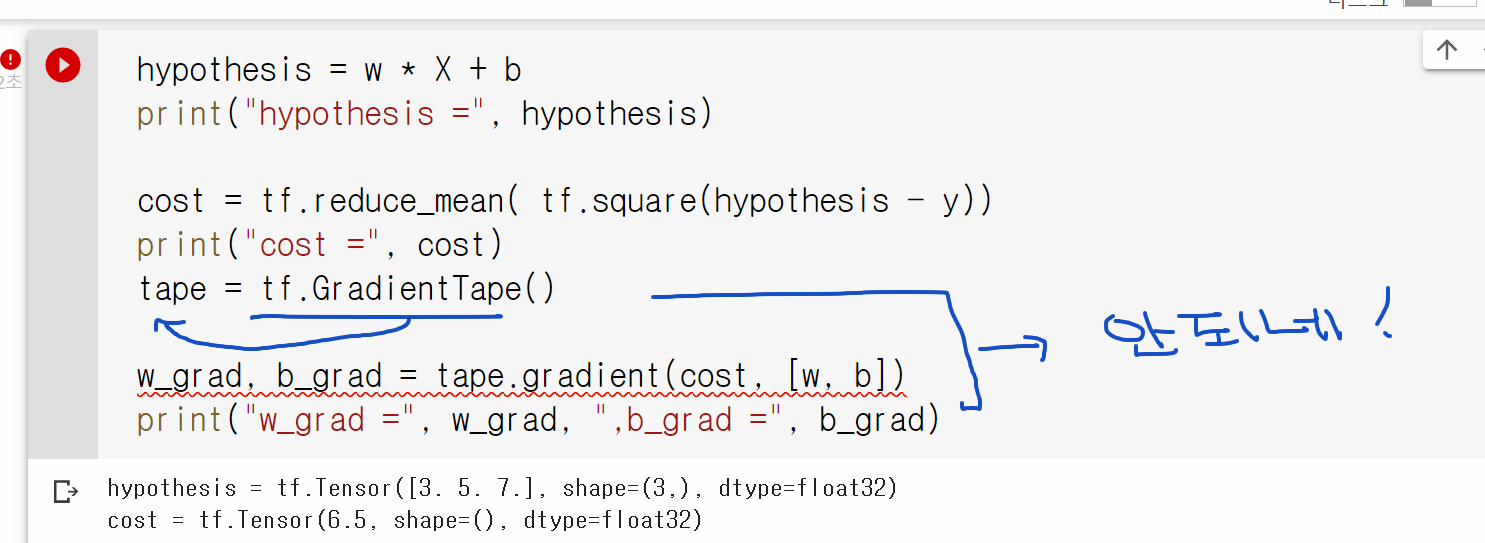

In [ ]:
hypothesis = w * X + b
print("hypothesis =", hypothesis)

cost = tf.reduce_mean( tf.square(hypothesis - y))
print("cost =", cost)
tape = tf.GradientTape()

w_grad, b_grad = tape.gradient(cost, [w, b])
print("w_grad =", w_grad, ",b_grad =", b_grad)

hypothesis = tf.Tensor([3. 5. 7.], shape=(3,), dtype=float32)
cost = tf.Tensor(6.5, shape=(), dtype=float32)


RuntimeError: ignored

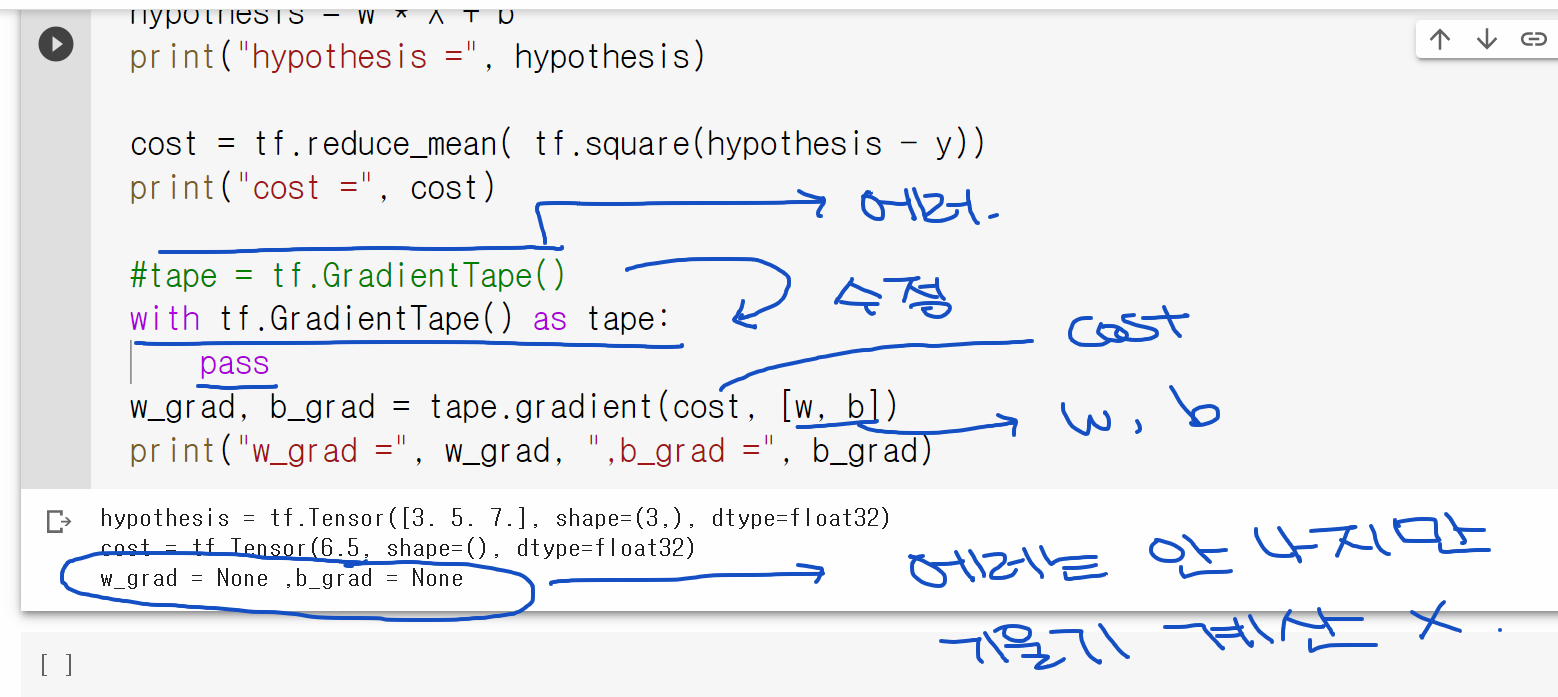

In [ ]:
hypothesis = w * X + b
print("hypothesis =", hypothesis)

cost = tf.reduce_mean( tf.square(hypothesis - y))
print("cost =", cost)

#tape = tf.GradientTape()
with tf.GradientTape() as tape:
    pass
w_grad, b_grad = tape.gradient(cost, [w, b])
print("w_grad =", w_grad, ",b_grad =", b_grad)

hypothesis = tf.Tensor([3. 5. 7.], shape=(3,), dtype=float32)
cost = tf.Tensor(6.5, shape=(), dtype=float32)
w_grad = None ,b_grad = None


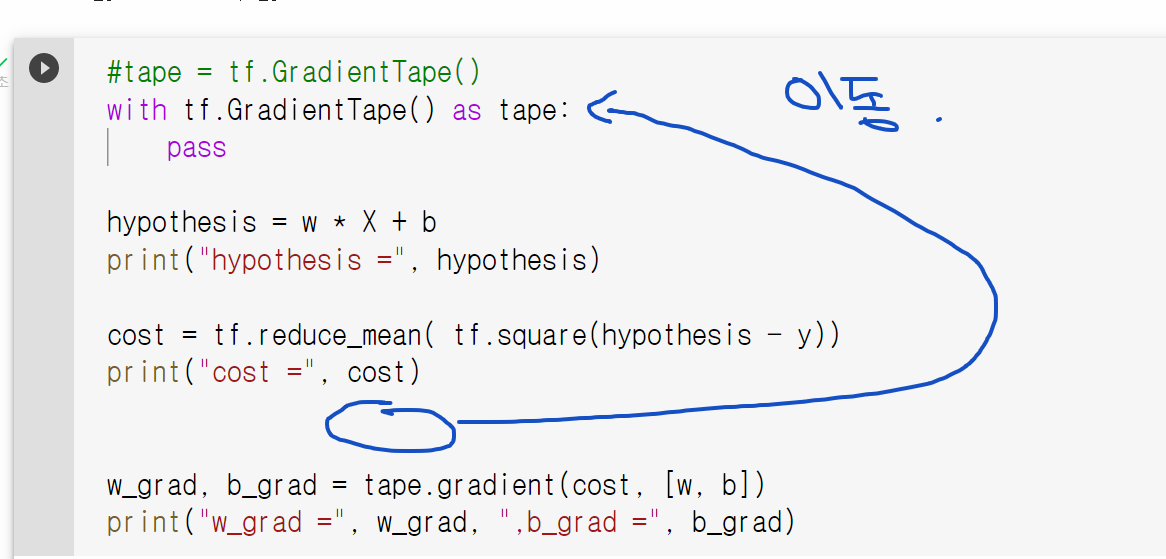

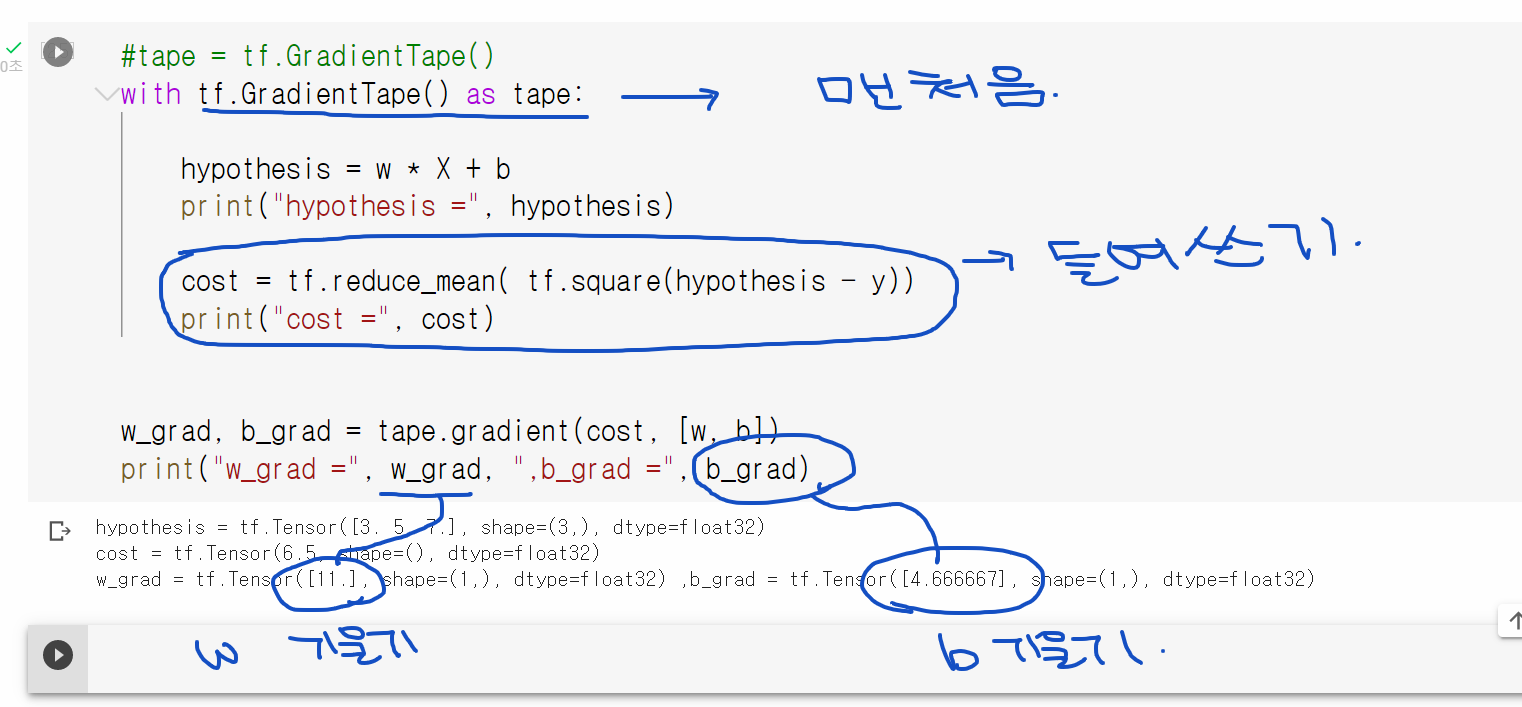

In [ ]:
#tape = tf.GradientTape()
with tf.GradientTape() as tape:

    hypothesis = w * X + b
    print("hypothesis =", hypothesis)

    cost = tf.reduce_mean( tf.square(hypothesis - y))
    print("cost =", cost)


w_grad, b_grad = tape.gradient(cost, [w, b])
print("w_grad =", w_grad, ",b_grad =", b_grad)

hypothesis = tf.Tensor([3. 5. 7.], shape=(3,), dtype=float32)
cost = tf.Tensor(6.5, shape=(), dtype=float32)
w_grad = tf.Tensor([11.], shape=(1,), dtype=float32) ,b_grad = tf.Tensor([4.666667], shape=(1,), dtype=float32)


In [ ]:
learning_rate = 0.1

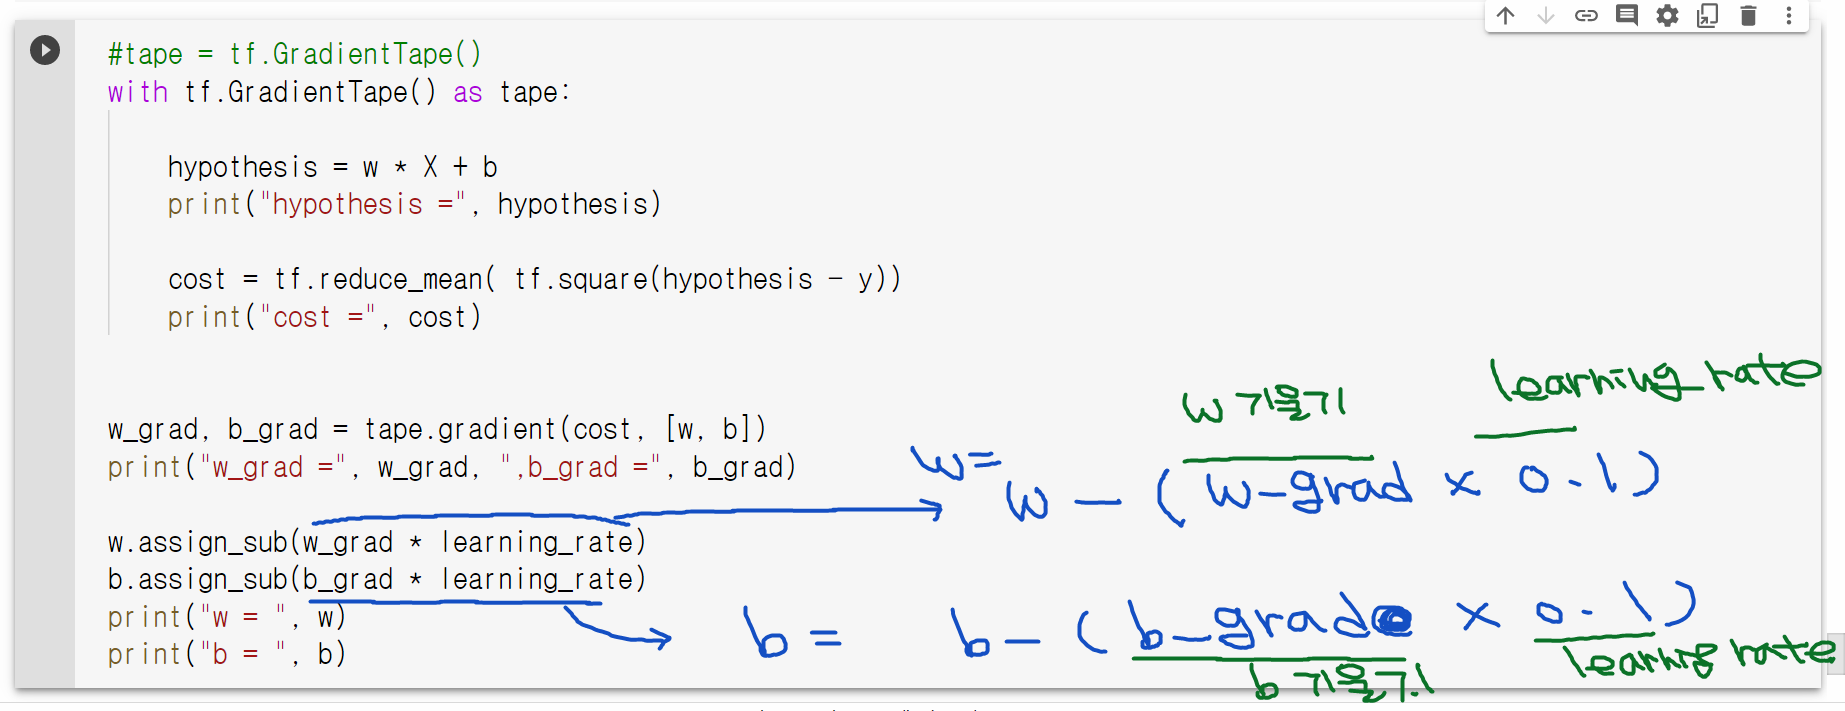

In [ ]:
#tape = tf.GradientTape()
with tf.GradientTape() as tape:

    hypothesis = w * X + b
    print("hypothesis =", hypothesis)

    cost = tf.reduce_mean( tf.square(hypothesis - y))
    print("cost =", cost)


w_grad, b_grad = tape.gradient(cost, [w, b])
print("w_grad =", w_grad, ",b_grad =", b_grad)

w.assign_sub(w_grad * learning_rate)
b.assign_sub(b_grad * learning_rate)
print("w = ", w)
print("b = ", b)

hypothesis = tf.Tensor([3. 5. 7.], shape=(3,), dtype=float32)
cost = tf.Tensor(6.5, shape=(), dtype=float32)
w_grad = tf.Tensor([11.], shape=(1,), dtype=float32) ,b_grad = tf.Tensor([4.666667], shape=(1,), dtype=float32)
w =  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.9], dtype=float32)>
b =  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.5333333], dtype=float32)>


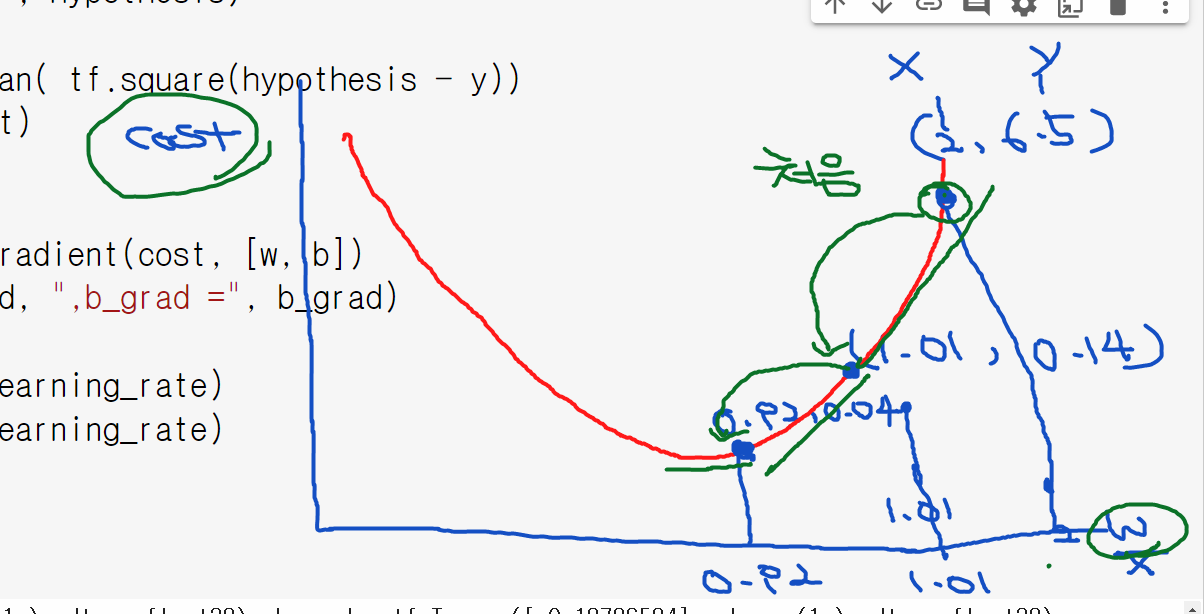

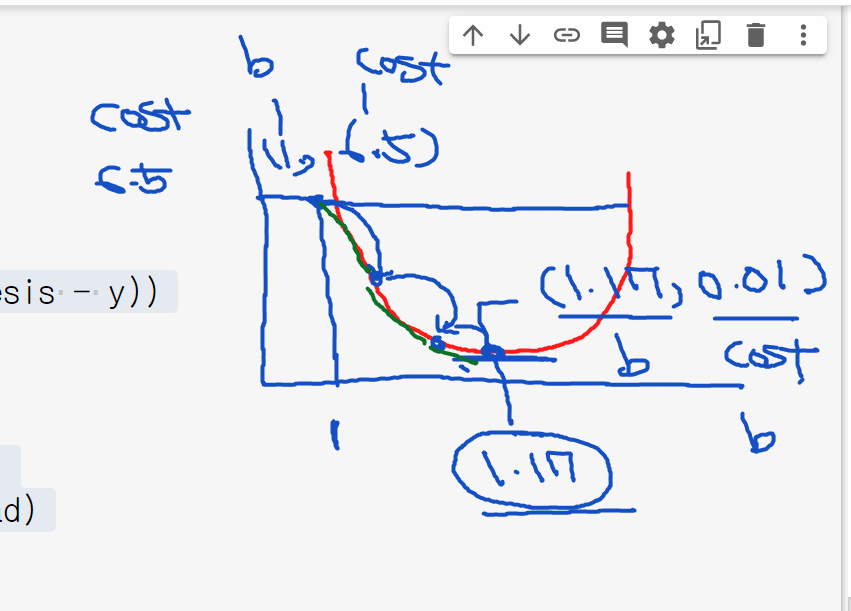

In [ ]:
for i in range(100):
    with tf.GradientTape() as tape:

        hypothesis = w * X + b
        print("hypothesis =", hypothesis)

        cost = tf.reduce_mean( tf.square(hypothesis - y))
        print("cost =", cost)


    w_grad, b_grad = tape.gradient(cost, [w, b])
    print("w_grad =", w_grad, ",b_grad =", b_grad)

    w.assign_sub(w_grad * learning_rate)
    b.assign_sub(b_grad * learning_rate)
    print("w = ", w)
    print("b = ", b)
    print("=" * 100)

hypothesis = tf.Tensor([1.4333333 2.3333333 3.233333 ], shape=(3,), dtype=float32)
cost = tf.Tensor(0.14000006, shape=(), dtype=float32)
w_grad = tf.Tensor([-1.1333339], shape=(1,), dtype=float32) ,b_grad = tf.Tensor([-0.6666669], shape=(1,), dtype=float32)
w =  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.0133333], dtype=float32)>
b =  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.6], dtype=float32)>
hypothesis = tf.Tensor([1.6133333 2.6266665 3.6399999], shape=(3,), dtype=float32)
cost = tf.Tensor(0.06171849, shape=(), dtype=float32)
w_grad = tf.Tensor([0.19111069], shape=(1,), dtype=float32) ,b_grad = tf.Tensor([-0.08000016], shape=(1,), dtype=float32)
w =  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.9942222], dtype=float32)>
b =  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.60800004], dtype=float32)>
hypothesis = tf.Tensor([1.6022222 2.5964446 3.5906668], shape=(3,), dtype=float32)
cost = tf.Ten

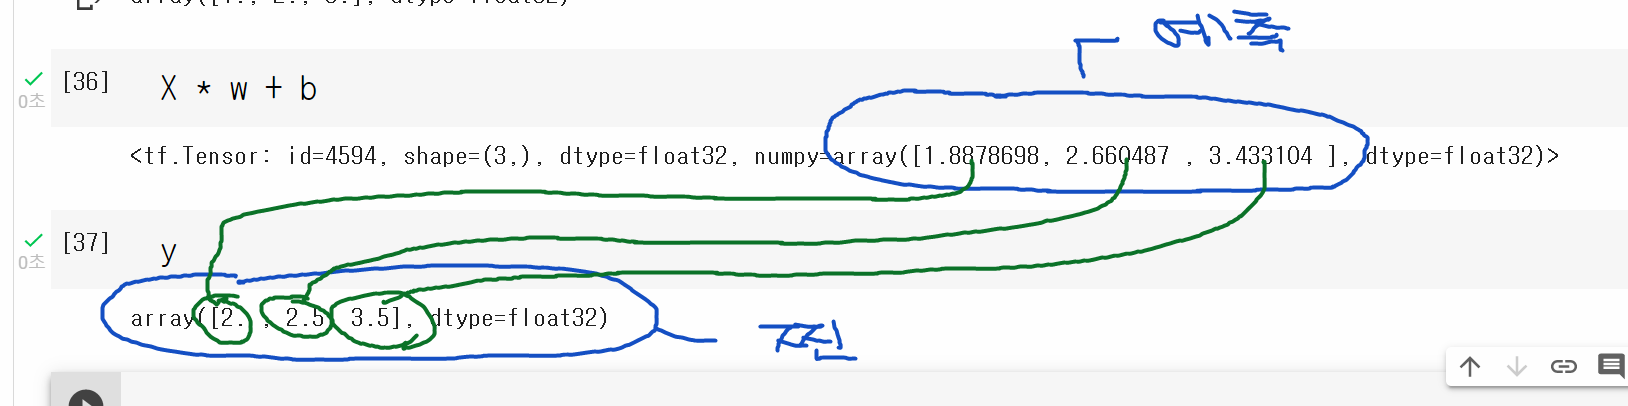

In [ ]:
X

array([1., 2., 3.], dtype=float32)

In [ ]:
X * w + b

<tf.Tensor: id=4594, shape=(3,), dtype=float32, numpy=array([1.8878698, 2.660487 , 3.433104 ], dtype=float32)>

In [ ]:
y

array([2. , 2.5, 3.5], dtype=float32)

In [ ]:
10 * w + b

<tf.Tensor: id=4599, shape=(1,), dtype=float32, numpy=array([8.841424], dtype=float32)>

In [ ]:
20 * w + b

<tf.Tensor: id=4604, shape=(1,), dtype=float32, numpy=array([16.567595], dtype=float32)>